In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

2024-07-19 10:40:05.654246: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load the dataset
ADA = pd.read_csv('/Users/kavian/Desktop/Crypto/Github/Crypto-Prediction/ADA.csv')

In [3]:
ADA.head()

,ticker,date,open,high,low,close
0,ADA,2017-12-30,0.4955,0.6941,0.4200,0.5900
1,ADA,2017-12-31,0.5900,0.7400,0.5900,0.7100
2,ADA,2018-01-01,0.7100,0.7150,0.6320,0.7022
3,ADA,2018-01-02,0.7022,0.8000,0.6750,0.7620
4,ADA,2018-01-03,0.7620,1.1000,0.7601,1.1000


In [4]:
# Feature engineering for ADA
ADA['MA5'] = ADA['close'].rolling(window=5).mean()
ADA['MA10'] = ADA['close'].rolling(window=10).mean()
ADA['MA20'] = ADA['close'].rolling(window=20).mean()
ADA = ADA.dropna()

In [5]:
ADA.head()

,ticker,date,open,high,low,close,MA5,MA10,MA20
19,ADA,2018-01-18,0.6250,0.6996,0.6000,0.6500,0.69084,0.74947,0.822445
20,ADA,2018-01-19,0.6500,0.6964,0.5890,0.6441,0.65966,0.73288,0.825150
21,ADA,2018-01-20,0.6479,0.7263,0.6400,0.7048,0.64662,0.72571,0.824890
22,ADA,2018-01-21,0.7049,0.7049,0.5765,0.6100,0.64662,0.71871,0.820280
23,ADA,2018-01-22,0.6165,0.6400,0.5100,0.5675,0.63528,0.68596,0.810555


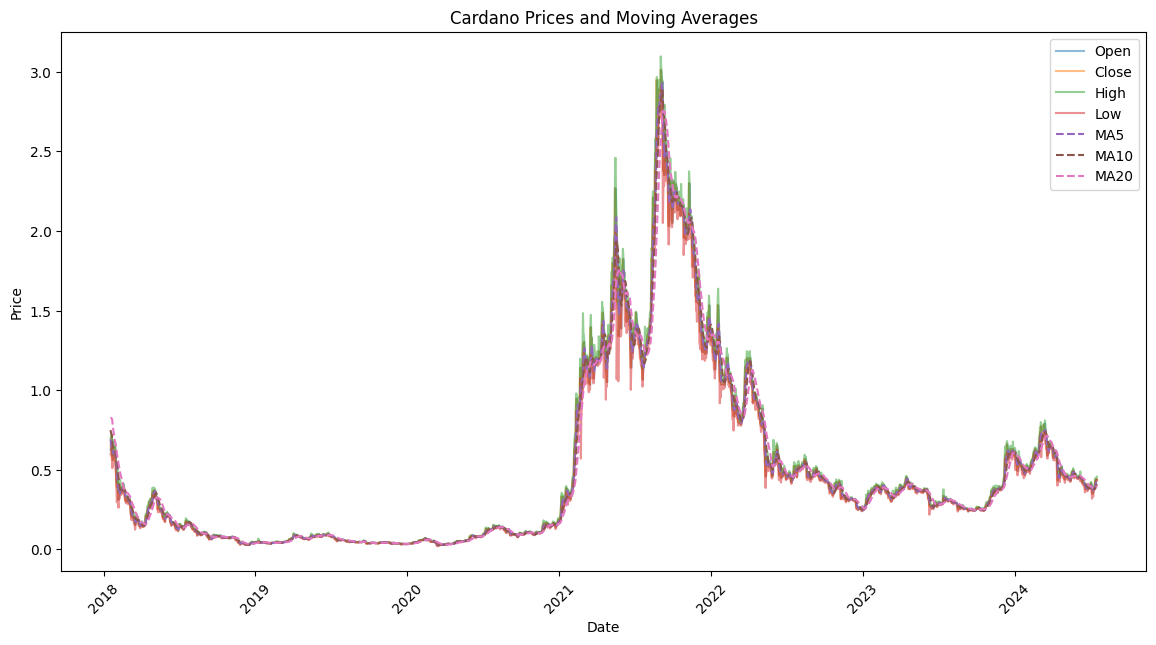

In [6]:
# Parse the Date column to datetime
ADA['date'] = pd.to_datetime(ADA['date'])

# Plotting the data
plt.figure(figsize=(14, 7))

# Plot Open, Close, High, Low prices
plt.plot(ADA['date'], ADA['open'], label='Open', alpha=0.5)
plt.plot(ADA['date'], ADA['close'], label='Close', alpha=0.5)
plt.plot(ADA['date'], ADA['high'], label='High', alpha=0.5)
plt.plot(ADA['date'], ADA['low'], label='Low', alpha=0.5)

# Plot Moving Averages
plt.plot(ADA['date'], ADA['MA5'], label='MA5', linestyle='--')
plt.plot(ADA['date'], ADA['MA10'], label='MA10', linestyle='--')
plt.plot(ADA['date'], ADA['MA20'], label='MA20', linestyle='--')

# Add titles and labels
plt.title('Cardano Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [7]:
BTC = pd.read_csv('/Users/kavian/Desktop/Crypto/Github/Crypto-Prediction/BTC.csv')

In [8]:
BTC.head()

,ticker,date,open,high,low,close
0,BTC,2010-07-17,0.04951,0.04951,0.04951,0.04951
1,BTC,2010-07-18,0.04951,0.08585,0.04951,0.08584
2,BTC,2010-07-19,0.08584,0.09307,0.07723,0.08080
3,BTC,2010-07-20,0.08080,0.08181,0.07426,0.07474
4,BTC,2010-07-21,0.07474,0.07921,0.06634,0.07921


In [9]:
# Feature engineering for BTC
BTC['MA5'] = BTC['close'].rolling(window=5).mean()
BTC['MA10'] = BTC['close'].rolling(window=10).mean()
BTC['MA20'] = BTC['close'].rolling(window=20).mean()
BTC = BTC.dropna()

In [10]:
BTC.head()

,ticker,date,open,high,low,close,MA5,MA10,MA20
19,BTC,2010-08-05,0.0570,0.0610,0.0570,0.0610,0.05982,0.061845,0.063135
20,BTC,2010-08-06,0.0610,0.0624,0.0607,0.0623,0.06006,0.062075,0.063775
21,BTC,2010-08-07,0.0623,0.0623,0.0590,0.0590,0.05986,0.062085,0.062433
22,BTC,2010-08-08,0.0590,0.0610,0.0590,0.0609,0.06004,0.061185,0.061438
23,BTC,2010-08-09,0.0609,0.0735,0.0593,0.0710,0.06284,0.062015,0.061251


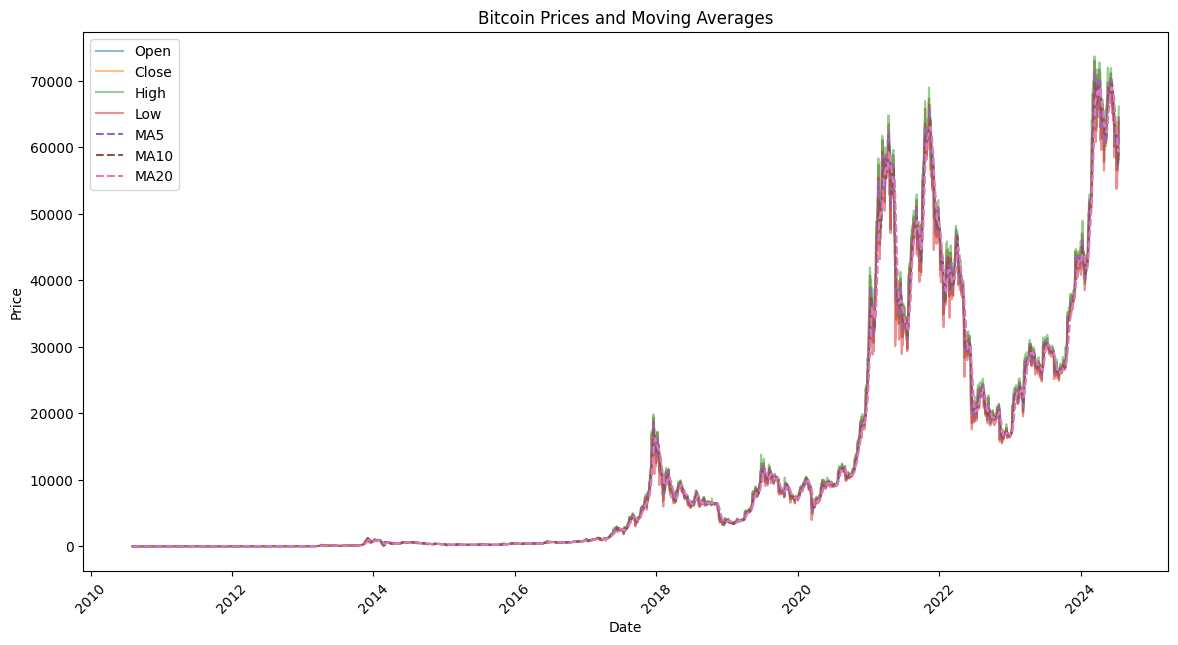

In [11]:
# Parse the Date column to datetime
BTC['date'] = pd.to_datetime(BTC['date'])

# Plotting the data
plt.figure(figsize=(14, 7))

# Plot Open, Close, High, Low prices
plt.plot(BTC['date'], BTC['open'], label='Open', alpha=0.5)
plt.plot(BTC['date'], BTC['close'], label='Close', alpha=0.5)
plt.plot(BTC['date'], BTC['high'], label='High', alpha=0.5)
plt.plot(BTC['date'], BTC['low'], label='Low', alpha=0.5)

# Plot Moving Averages
plt.plot(BTC['date'], BTC['MA5'], label='MA5', linestyle='--')
plt.plot(BTC['date'], BTC['MA10'], label='MA10', linestyle='--')
plt.plot(BTC['date'], BTC['MA20'], label='MA20', linestyle='--')

# Add titles and labels
plt.title('Bitcoin Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [12]:
ETH = pd.read_csv("/Users/kavian/Desktop/Crypto/Github/Crypto-Prediction/ETH.csv")

In [13]:
ETH.head()

,ticker,date,open,high,low,close
0,ETH,2015-08-07,3.0,3.0,3.0000,3.00
1,ETH,2015-08-08,3.0,3.0,1.2000,1.20
2,ETH,2015-08-09,1.2,1.2,1.2000,1.20
3,ETH,2015-08-10,1.2,1.2,1.2000,1.20
4,ETH,2015-08-11,1.2,1.2,0.6504,0.99


In [14]:
# Feature engineering for ETH
ETH['MA5'] = ETH['close'].rolling(window=5).mean()
ETH['MA10'] = ETH['close'].rolling(window=10).mean()
ETH['MA20'] = ETH['close'].rolling(window=20).mean()
ETH = ETH.dropna()

In [15]:
ETH.head()

,ticker,date,open,high,low,close,MA5,MA10,MA20
19,ETH,2015-08-26,1.27,1.27,1.08,1.18,1.288,1.330,1.4505
20,ETH,2015-08-27,1.18,1.19,1.14,1.14,1.236,1.314,1.3575
21,ETH,2015-08-28,1.14,1.30,1.14,1.30,1.226,1.308,1.3625
22,ETH,2015-08-29,1.30,1.30,1.15,1.18,1.214,1.302,1.3615
23,ETH,2015-08-30,1.18,1.35,1.17,1.32,1.224,1.282,1.3675


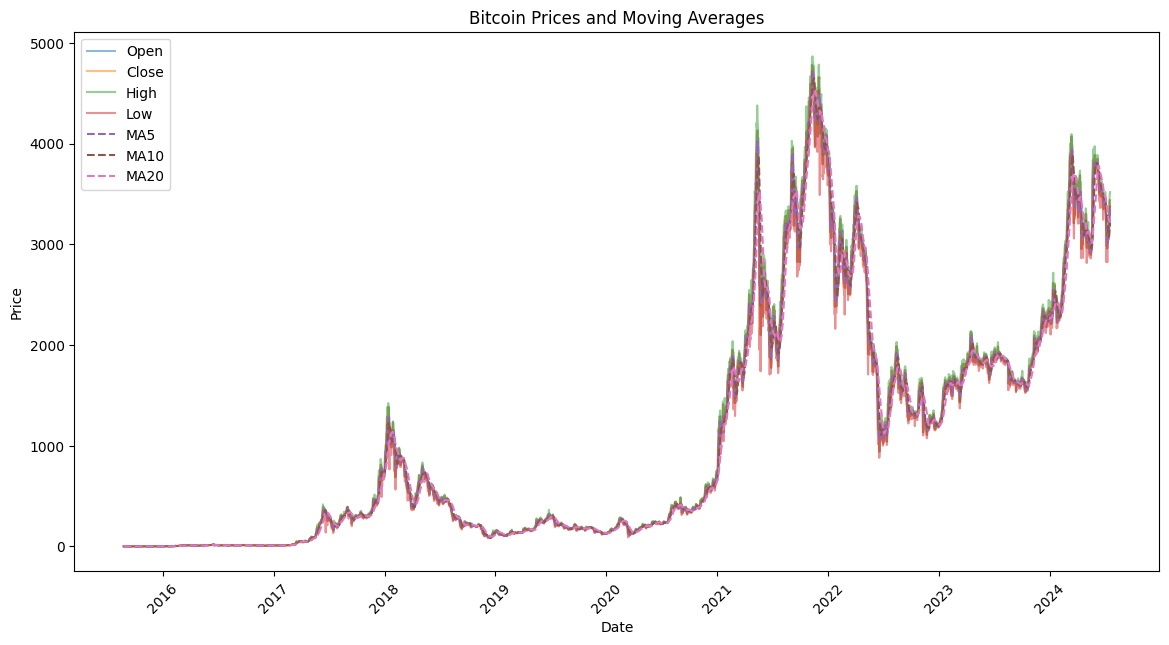

In [16]:
# Parse the Date column to datetime
ETH['date'] = pd.to_datetime(ETH['date'])

# Plotting the data
plt.figure(figsize=(14, 7))

# Plot Open, Close, High, Low prices
plt.plot(ETH['date'], ETH['open'], label='Open', alpha=0.5)
plt.plot(ETH['date'], ETH['close'], label='Close', alpha=0.5)
plt.plot(ETH['date'], ETH['high'], label='High', alpha=0.5)
plt.plot(ETH['date'], ETH['low'], label='Low', alpha=0.5)

# Plot Moving Averages
plt.plot(ETH['date'], ETH['MA5'], label='MA5', linestyle='--')
plt.plot(ETH['date'], ETH['MA10'], label='MA10', linestyle='--')
plt.plot(ETH['date'], ETH['MA20'], label='MA20', linestyle='--')

# Add titles and labels
plt.title('Bitcoin Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [17]:
# Create the target variable (next day's closing price)
ADA['Next_Close'] = ADA['close'].shift(-1)
ADA = ADA.dropna()

BTC['Next_Close'] = BTC['close'].shift(-1)
BTC = BTC.dropna()

ETH['Next_Close'] = ETH['close'].shift(-1)
ETH = ETH.dropna()

In [18]:
# Select features and target
ADA_features = ADA[['open', 'low', 'high', 'close', 'MA5', 'MA10', 'MA20']]
ADA_target = ADA['Next_Close']

BTC_features = BTC[['open', 'low', 'high', 'close', 'MA5', 'MA10', 'MA20']]
BTC_target = BTC['Next_Close']

ETH_features = ETH[['open', 'low', 'high', 'close', 'MA5', 'MA10', 'MA20']]
ETH_target = ETH['Next_Close']

In [19]:
ADA_features

,open,low,high,close,MA5,MA10,MA20
19,0.625000,0.600000,0.699600,0.650000,0.690840,0.749470,0.822445
20,0.650000,0.589000,0.696400,0.644100,0.659660,0.732880,0.825150
21,0.647900,0.640000,0.726300,0.704800,0.646620,0.725710,0.824890
22,0.704900,0.576500,0.704900,0.610000,0.646620,0.718710,0.820280
23,0.616500,0.510000,0.640000,0.567500,0.635280,0.685960,0.810555
...,...,...,...,...,...,...,...
2386,0.393588,0.391998,0.418003,0.411218,0.386717,0.379264,0.385218
2387,0.411178,0.410692,0.446086,0.438965,0.400734,0.382377,0.388010
2388,0.439022,0.425190,0.445016,0.436571,0.412700,0.388186,0.391016
2389,0.436571,0.431193,0.443467,0.437809,0.423610,0.396905,0.393255


In [20]:
ADA_features.shape

(2372, 7)

In [21]:
ADA_target

19      0.644100
20      0.704800
21      0.610000
22      0.567500
23      0.560100
          ...   
2386    0.438965
2387    0.436571
2388    0.437809
2389    0.438220
2390    0.440910
Name: Next_Close, Length: 2372, dtype: float64

In [22]:
ADA_target.shape

(2372,)

In [23]:
BTC_features

,open,low,high,close,MA5,MA10,MA20
19,0.0570,0.0570,0.0610,0.0610,0.05982,0.061845,0.063135
20,0.0610,0.0607,0.0624,0.0623,0.06006,0.062075,0.063775
21,0.0623,0.0590,0.0623,0.0590,0.05986,0.062085,0.062433
22,0.0590,0.0590,0.0610,0.0609,0.06004,0.061185,0.061438
23,0.0609,0.0593,0.0735,0.0710,0.06284,0.062015,0.061251
...,...,...,...,...,...,...,...
5109,57458.3000,56542.5000,58542.5000,57612.9000,57390.92000,57658.010000,59638.685000
5110,57608.0000,57590.9000,58971.9000,58696.6000,57799.28000,57509.600000,59383.485000
5111,58693.3000,58298.1000,61428.6000,61299.0000,58499.32000,57793.430000,59445.630000
5112,61333.1000,60664.2000,63855.9000,63564.2000,59726.20000,58497.400000,59528.570000


In [24]:
BTC_target

19          0.0623
20          0.0590
21          0.0609
22          0.0710
23          0.0700
           ...    
5109    58696.6000
5110    61299.0000
5111    63564.2000
5112    64516.1000
5113    64323.8000
Name: Next_Close, Length: 5095, dtype: float64

In [25]:
ETH_features

,open,low,high,close,MA5,MA10,MA20
19,1.27,1.08,1.27,1.18,1.288,1.330,1.4505
20,1.18,1.14,1.19,1.14,1.236,1.314,1.3575
21,1.14,1.14,1.30,1.30,1.226,1.308,1.3625
22,1.30,1.15,1.30,1.18,1.214,1.302,1.3615
23,1.18,1.17,1.35,1.32,1.224,1.282,1.3675
...,...,...,...,...,...,...,...
3262,3109.67,3045.58,3158.42,3120.27,3082.486,3086.336,3245.8930
3263,3119.39,3114.33,3170.62,3165.94,3110.490,3073.458,3232.5175
3264,3165.37,3144.80,3256.71,3255.16,3149.358,3082.854,3227.7990
3265,3256.71,3234.16,3447.75,3422.11,3214.628,3127.221,3228.8850


In [26]:
ETH_target

19         1.14
20         1.30
21         1.18
22         1.32
23         1.31
         ...   
3262    3165.94
3263    3255.16
3264    3422.11
3265    3437.38
3266    3412.70
Name: Next_Close, Length: 3248, dtype: float64

In [27]:
print(f'Cardano (ADA) Features Shape: {ADA_features.shape}')
print(f'Cardano (ADA) Target Shape: {ADA_target.shape}')
print("\n")
print(f'Bitcoin (BTC) Features Shape: {BTC_features.shape}')
print(f'Bitcoin (BTC) Target Shape: {BTC_target.shape}')
print("\n")
print(f'Ethereum (ETH) Features Shape: {ETH_features.shape}')
print(f'Ethereum (ETH) Target Shape: {ETH_target.shape}')

Cardano (ADA) Features Shape: (2372, 7)
Cardano (ADA) Target Shape: (2372,)


Bitcoin (BTC) Features Shape: (5095, 7)
Bitcoin (BTC) Target Shape: (5095,)


Ethereum (ETH) Features Shape: (3248, 7)
Ethereum (ETH) Target Shape: (3248,)


In [28]:
# Normalizing the features
scaler = MinMaxScaler()

ADA_features_scaled = scaler.fit_transform(ADA_features)
#BTC_features_scaled = scaler.fit_transform(BTC_features)
#ETH_features_scaled = scaler.fit_transform(ETH_features)

In [29]:
ADA_features_scaled

array([[0.20120472, 0.2013272 , 0.21920748, ..., 0.22912335, 0.25269146,
        0.29152756],
       [0.20957082, 0.1975174 , 0.2181653 , ..., 0.21838037, 0.24688486,
        0.29252086],
       [0.20886807, 0.21518102, 0.22790322, ..., 0.21388747, 0.24437531,
        0.29242538],
       ...,
       [0.13896829, 0.14078253, 0.13629379, ..., 0.133291  , 0.12623985,
        0.13310388],
       [0.13814808, 0.14286165, 0.13578931, ..., 0.13705001, 0.12929159,
        0.13392588],
       [0.1385791 , 0.14128993, 0.13878006, ..., 0.14013247, 0.13168455,
        0.13487173]])

In [30]:
# Normalizing Targets

#Target Scaler
target_scaler = MinMaxScaler()


target_ADA = ADA_target.values.reshape(-1, 1)
ADA_target_scaled = target_scaler.fit_transform(target_ADA)

#target_BTC = BTC_target.values.reshape(-1, 1)
#BTC_target_scaled = target_scaler.fit_transform(target_BTC)

#target_ETH = ETH_target.values.reshape(-1, 1)
#ETH_target_scaled = target_scaler.fit_transform(target_ETH)

In [31]:
ADA_target_scaled

array([[0.20752697],
       [0.22783307],
       [0.19611943],
       ...,
       [0.13851602],
       [0.13865351],
       [0.1395534 ]])

In [32]:
# Train-test split
X_train_ADA, X_test_ADA, y_train_ADA, y_test_ADA = train_test_split(ADA_features_scaled, ADA_target_scaled, test_size=0.2, random_state=42)
#X_train_BTC, X_test_BTC, y_train_BTC, y_test_BTC = train_test_split(BTC_features_scaled, BTC_target_scaled, test_size=0.2, random_state=42)
#X_train_ETH, X_test_ETH, y_train_ETH, y_test_ETH = train_test_split(ETH_features_scaled, ETH_target_scaled, test_size=0.2, random_state=42)

In [38]:
# Build the neural network model
model = Sequential()
model.add(Dense(units=32, activation='relu',))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1))

In [95]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mean_squared_error'])

In [96]:
# Train the model
history = model.fit(X_train_ADA, y_train_ADA, epochs=50, batch_size=64, validation_split=0.2)


Epoch 1/50
24/24 [==============================] - 1s 7ms/step - loss: 0.0114 - mean_squared_error: 3.3258e-04 - val_loss: 0.0076 - val_mean_squared_error: 3.0405e-04
Epoch 2/50
24/24 [==============================] - 0s 2ms/step - loss: 0.0067 - mean_squared_error: 1.9233e-04 - val_loss: 0.0074 - val_mean_squared_error: 3.0246e-04
Epoch 3/50
24/24 [==============================] - 0s 3ms/step - loss: 0.0065 - mean_squared_error: 1.9799e-04 - val_loss: 0.0074 - val_mean_squared_error: 2.9918e-04
Epoch 4/50
24/24 [==============================] - 0s 3ms/step - loss: 0.0064 - mean_squared_error: 1.9020e-04 - val_loss: 0.0075 - val_mean_squared_error: 3.1631e-04
Epoch 5/50
24/24 [==============================] - 0s 2ms/step - loss: 0.0067 - mean_squared_error: 2.0624e-04 - val_loss: 0.0074 - val_mean_squared_error: 3.0203e-04
Epoch 6/50
24/24 [==============================] - 0s 2ms/step - loss: 0.0066 - mean_squared_error: 1.9806e-04 - val_loss: 0.0078 - val_mean_squared_error: 3.2

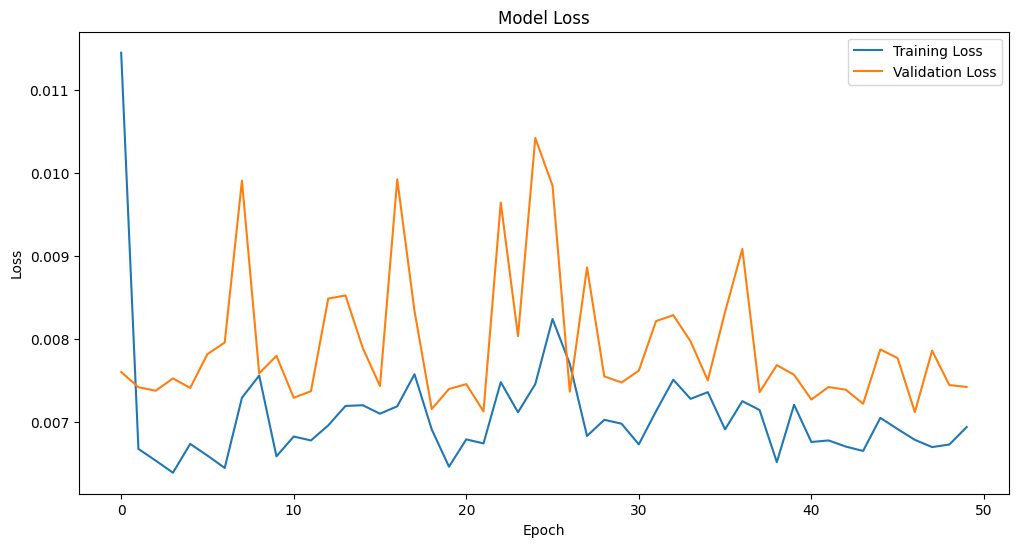

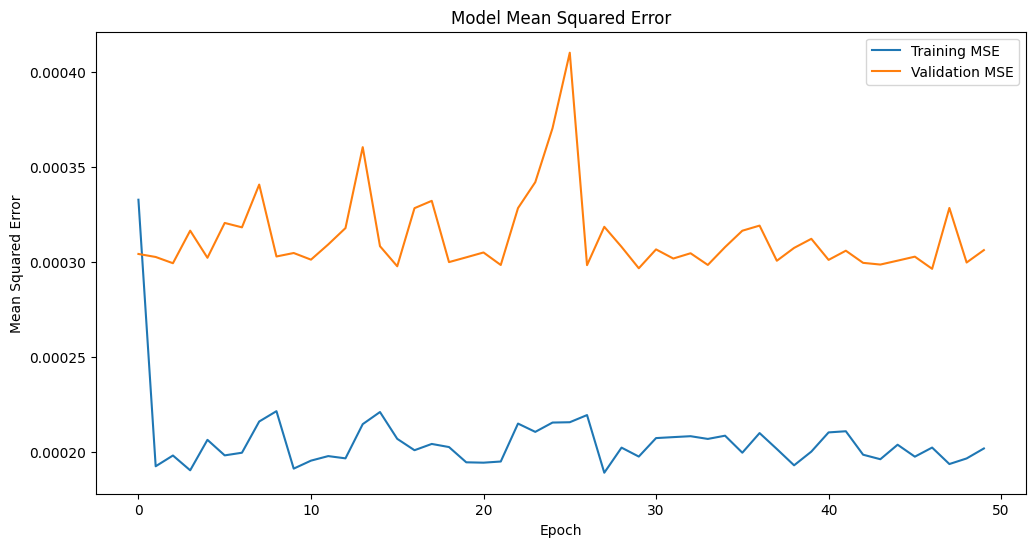

In [97]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

# Plot training & validation mean squared error values
plt.figure(figsize=(12, 6))
plt.plot(history.history['mean_squared_error'], label='Training MSE')
plt.plot(history.history['val_mean_squared_error'], label='Validation MSE')
plt.title('Model Mean Squared Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend(['Training MSE', 'Validation MSE'], loc='upper right')
plt.show()


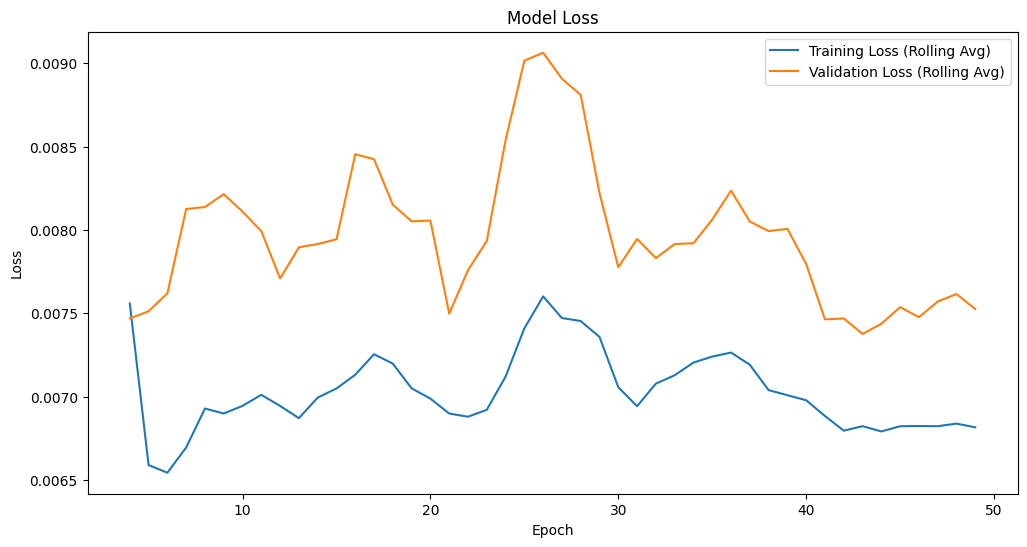

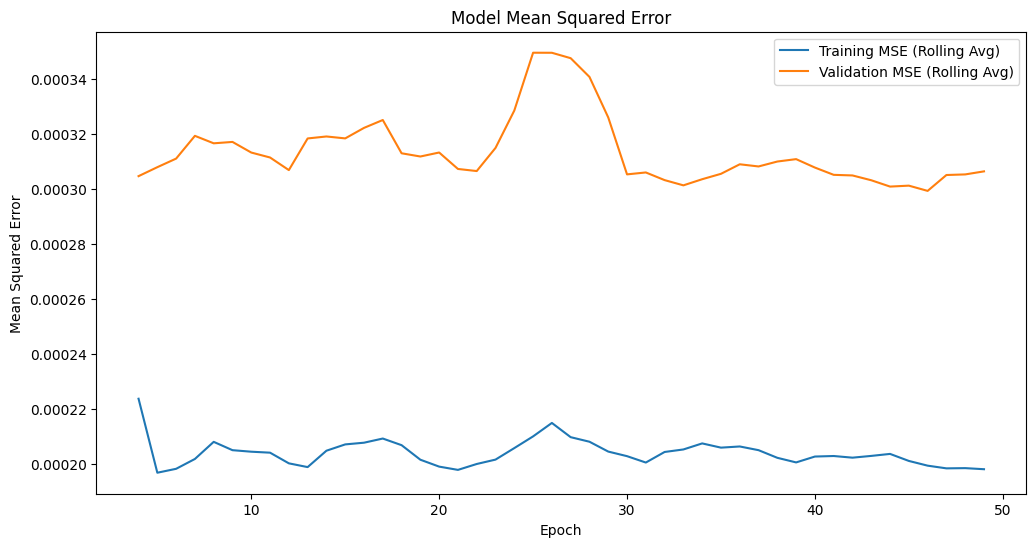

In [98]:
# Convert history.history to a DataFrame for easier manipulation
history_df = pd.DataFrame(history.history)

# Apply rolling average with a window size of 5
history_df['loss_rolling'] = history_df['loss'].rolling(window=5).mean()
history_df['val_loss_rolling'] = history_df['val_loss'].rolling(window=5).mean()
history_df['mse_rolling'] = history_df['mean_squared_error'].rolling(window=5).mean()
history_df['val_mse_rolling'] = history_df['val_mean_squared_error'].rolling(window=5).mean()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history_df['loss_rolling'], label='Training Loss (Rolling Avg)')
plt.plot(history_df['val_loss_rolling'], label='Validation Loss (Rolling Avg)')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss (Rolling Avg)', 'Validation Loss (Rolling Avg)'], loc='upper right')
plt.show()

# Plot training & validation mean squared error values
plt.figure(figsize=(12, 6))
plt.plot(history_df['mse_rolling'], label='Training MSE (Rolling Avg)')
plt.plot(history_df['val_mse_rolling'], label='Validation MSE (Rolling Avg)')
plt.title('Model Mean Squared Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend(['Training MSE (Rolling Avg)', 'Validation MSE (Rolling Avg)'], loc='upper right')
plt.show()

In [99]:
# Evaluate the model
loss = model.evaluate(X_test_ADA, y_test_ADA)
print(f'Test Loss: {loss}')

# Make predictions
predictions = model.predict(X_test_ADA)

15/15 [==============================] - 0s 2ms/step - loss: 0.0061 - mean_squared_error: 1.6635e-04
Test Loss: [0.006132898386567831, 0.0001663480361457914]
15/15 [==============================] - 0s 809us/step


In [100]:
new_data = ADA_features_scaled[-2].reshape(1, -1)

# Make a prediction
predicted_scaled = model.predict(new_data)

# Inverse transform the predicted value to get the original scale
predicted_original = target_scaler.inverse_transform(predicted_scaled)

print(f'Predicted next closing price: {predicted_original[0][0]}')

1/1 [==============================] - 0s 27ms/step
Predicted next closing price: 0.4305482804775238
